AES là một mật mã không phải Feistel. 

AES làm việc với các khối dữ liệu 128bit và độ dài khóa 128bit, 192bit hoặc 256bit. Các khóa mở rộng sử dụng trong chu trình được tạo ra bởi thủ tục sinh khóa Rijndael.

Hầu hết các phép toán trong thuật toán AES đều thực hiện trong một trường hữu hạn của các byte. Mỗi khối dữ liệu đầu vào 128bit được chia thành 16byte, có thể xếp thành 4 cột, mỗi cột 4 phần tử hay một ma trận 4x4 của các byte, nó gọi là ma trận trạng thái.

Tùy thuộc vào độ dài của khóa khi sử dụng 128bit, 192bit hay 256bit mà thuật toán được thực hiện với số lần lặp khác nhau

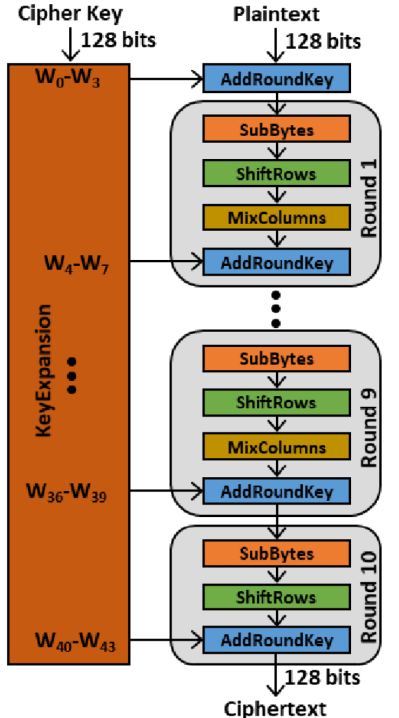.

Các bước xử lý chính:

- Quá trình mở rộng khóa sử dụng thủ tục sinh khóa Rijndael.
- 
Quá trình mã hóa.

Thuật toán

1. Xây dựng bảng S-box

Phép biến đổi đầu tiên Subytes, được sử dụng tại phía mã hóa. Để thay thế một byte, chúng ta biên dịch byte thành hai chữ số thập lục phân

a. Bảng S-box thuận:
- Bảng S-box thuận được sinh ra bằng việc xác định nghịch đảo cho một giá trị nhất định trên GF(28) = GF(2)[x] / (x8+x4+x3+x+1) (trường hữu hạn Rijindael). Giá trị 0 không có nghịch đảo thì được ánh xạ với 0. Những nghịch đảo được chuyển đổi thông qua phép biến đổi affine.
- Công thức tính các giá trị bảng S-box và bảng S- box tương ứng:
  
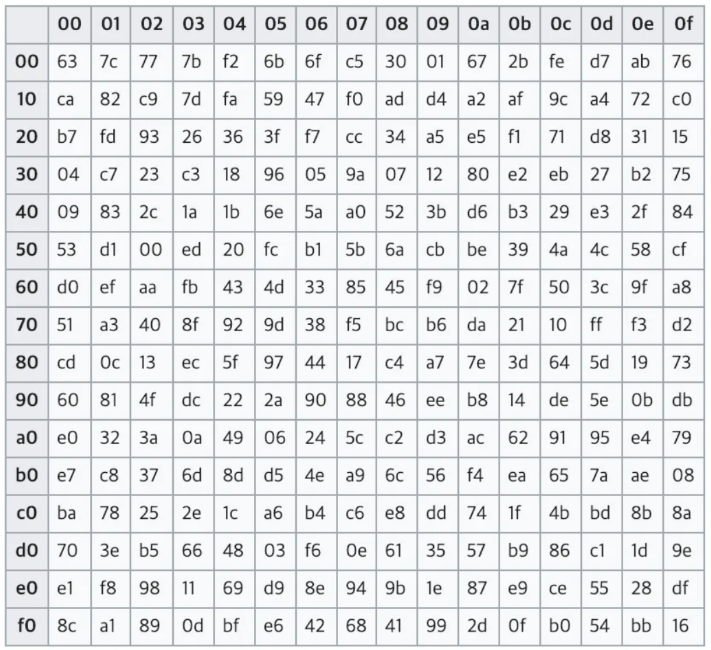

b. Bảng S-box nghịch

S-box nghịch đảo chỉ đơn giản là S-box chạy ngược. Nó được tính bằng phép biến đổi affine nghịch đảo các giá trị đầu vào. Phép biến đổi affine nghịch đảo được biểu diễn như sau:

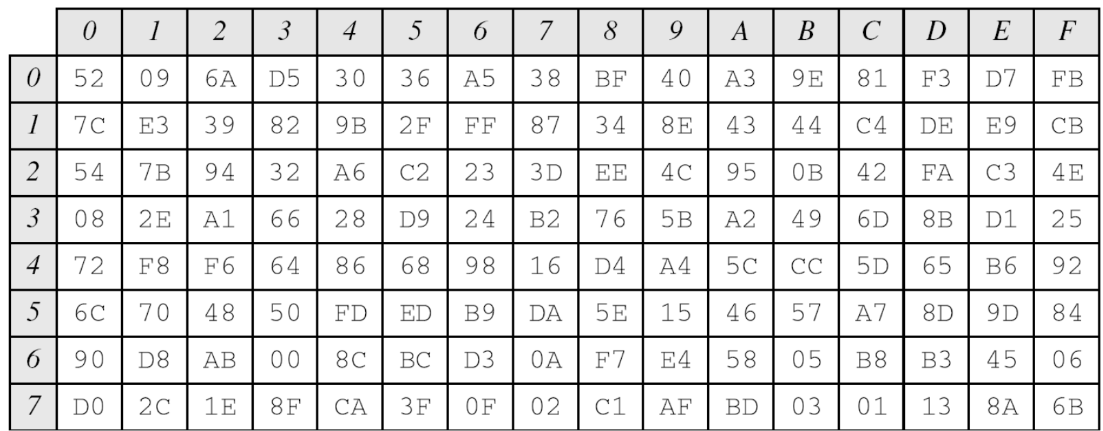
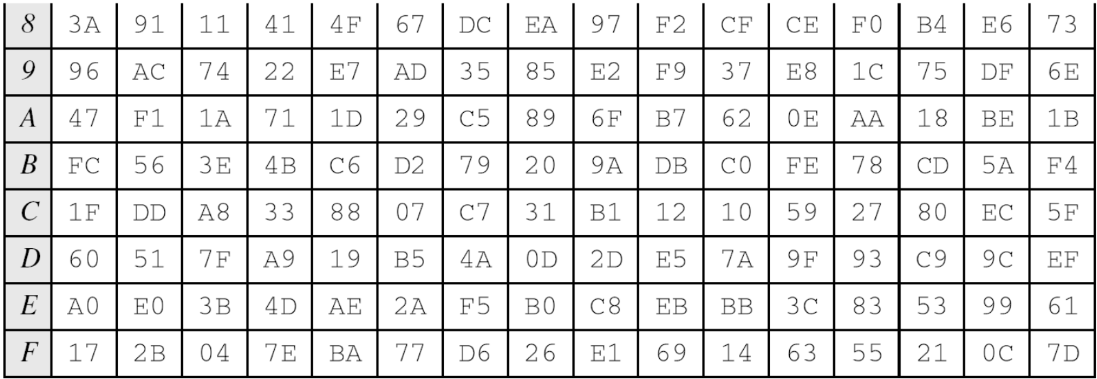

2. Giải thuật sinh khóa phụ

Quá trình sinh khóa phụ gồm 4 bước:
- Quay trái 8 bit
- Subytes
- Tính giá trị Rcon(i) trong đó:
  Rcon(i) = x(i-1) mod (x8 + x4 + x3 + x + 1).
- ShiftRow

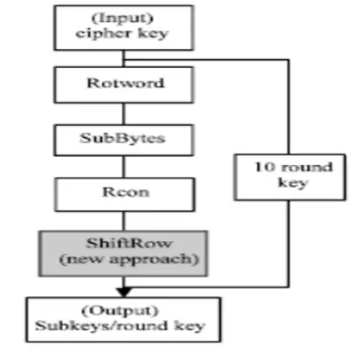

3. Quá trình mã hóa
   
a. Sơ đồ tổng quát

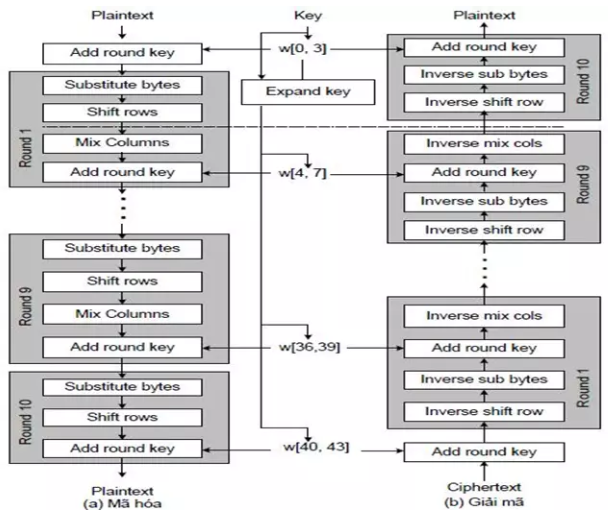

b. Hàm AddRoundKey

- Được áp dụng từ vòng lặp thứ 1 tới vòng lặp Nr
- Trong biến đổi Addroundkey(), một khóa vòng được cộng với state bằng một phép XOR theo từng bit đơn giản.
  
- Mỗi khóa vòng gồm có 4 từ (128 bit) được lấy từ lịch trình khóa. 4 từ đó được cộng vào mỗi cột của state, sao cho:

 [S’0,c, S’1,c, S’2,c, S’3,c ] = [S0,c, S1,c, S2,c, S3,c ] ? [W(4*i + c)] với 0 <= c < 4. 
 

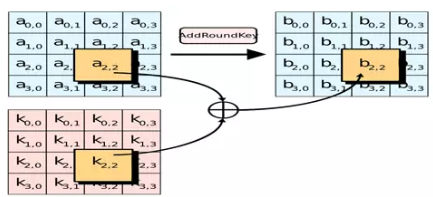

c. Hàm SubBytes

Biến đổi SubBytes() thay thế mỗi byte riêng rẽ của state Sr,c bằng một giá trị mới S’ r,c sử dụng bảng thay thế (S - box) được xây dựng ở trên.

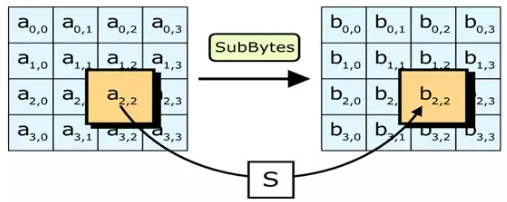

d. Hàm ShiftRow

- Trong biến đổi ShiftRows(), các byte trong ba hàng cuối cùng của trạng thái được dịch vòng đi các số byte khác nhau (độ lệch). Cụ thể :

S’r,c = Sr,(c + shift ( r, Nb)) mod Nb (Nb = 4)

- Trong đó giá trị dịch shift (r, Nb) phụ thuộc vào số hàng r như sau:

Shift(1,4) = 1, shift(2,4) = 2, shift(3,4) = 3.
- Hàng đầu tiên không bị dịch, ba hàng còn lại bị dịch tương ứng:

      - Hàng thứ 1 giữ nguyên.      - 
Hàng thứ 2 dịch vòng trái 1 lần.      - 
Hàng thứ 3 dịch vòng trái 2 lần      - .
Hàng thứ 4 dịch vòng trái 3 l


  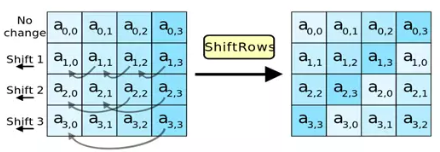

e. Hàm Mixcolumns

- Biến đổi MixColumns() tính toán trên từng cột của state. Các cột được coi như là đa thức trong trường GF(28) và nhân với một đa thức a(x) với:

  a(x) = (03)x^3 +(01)x^2 +(01)x + (02)
- Biến đổi này có thể được trình bày như phép nhân một ma trận, mà mỗi byte được hiểu như là một phần tử trong trường GF(28): s’(x) = a(x) ? s(x)
- Mô tả bằng ma trận như sau:
  
  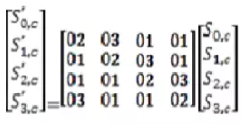
ần.


Quá trình giải mã

Thuật toán giải mã khá giống với thuật toán mã hóa về mặt cấu trúc nhưng 4 hàm sử dụng là 4 hàm ngược của quá trình mã hóa.

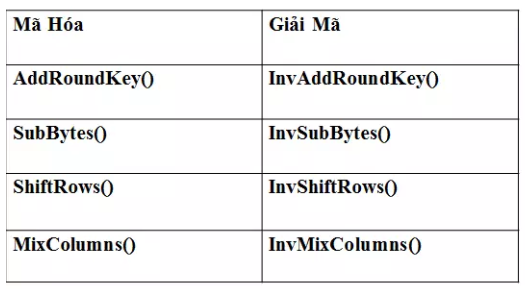

Ví dụ:

In [2]:
import numpy as np

def padded_hex8(i):
    given_int = i
    given_len = 8

    hex_result = hex(given_int)[2:] 
    num_hex_chars = len(hex_result)
    extra_zeros = '0' * (given_len - num_hex_chars) 

    return (hex_result if num_hex_chars == given_len else
            extra_zeros + hex_result)

def xor2to8(hex_1, hex_2):
    ans = padded_hex8(int(hex_1, 16) ^ int(hex_2, 16))
    return ans

def padded_hex(i):
    given_int = i
    given_len = 2

    hex_result = hex(given_int)[2:] 
    num_hex_chars = len(hex_result)
    extra_zeros = '0' * (given_len - num_hex_chars) 

    return (hex_result if num_hex_chars == given_len else
            extra_zeros + hex_result )


def xor2(hex_1,hex_2):
    ans = padded_hex(int(hex_1, 16) ^ int(hex_2, 16))
    return ans


def rotword(word):
    res = word[2:] + word[:2]
    return res


def xor(hex_1,hex_2,hex_3,hex_4):
    ans = padded_hex(int(hex_1, 16) ^ int(hex_2, 16) ^ int(hex_3, 16) ^ int(hex_4, 16))
    return ans

# E table
def e(h2): 

    E = (
    [0x01, 0x03, 0x05, 0x0F, 0x11, 0x33, 0x55, 0xFF, 0x1A, 0x2E, 0x72, 0x96, 0xA1, 0xF8, 0x13, 0x35],
    [0x5F, 0xE1, 0x38, 0x48, 0xD8, 0x73, 0x95, 0xA4, 0xF7, 0x02, 0x06, 0x0A, 0x1E, 0x22, 0x66, 0xAA],
    [0xE5, 0x34, 0x5C, 0xE4, 0x37, 0x59, 0xEB, 0x26, 0x6A, 0xBE, 0xD9, 0x70, 0x90, 0xAB, 0xE6, 0x31],
    [0x53, 0xF5, 0x04, 0x0C, 0x14, 0x3C, 0x44, 0xCC, 0x4F, 0xD1, 0x68, 0xB8, 0xD3, 0x6E, 0xB2, 0xCD],
    [0x4C, 0xD4, 0x67, 0xA9, 0xE0, 0x3B, 0x4D, 0xD7, 0x62, 0xA6, 0xF1, 0x08, 0x18, 0x28, 0x78, 0x88],
    [0x83, 0x9E, 0xB9, 0xD0, 0x6B, 0xBD, 0xDC, 0x7F, 0x81, 0x98, 0xB3, 0xCE, 0x49, 0xDB, 0x76, 0x9A],
    [0xB5, 0xC4, 0x57, 0xF9, 0x10, 0x30, 0x50, 0xF0, 0x0B, 0x1D, 0x27, 0x69, 0xBB, 0xD6, 0x61, 0xA3],
    [0xFE, 0x19, 0x2B, 0x7D, 0x87, 0x92, 0xAD, 0xEC, 0x2F, 0x71, 0x93, 0xAE, 0xE9, 0x20, 0x60, 0xA0],
    [0xFB, 0x16, 0x3A, 0x4E, 0xD2, 0x6D, 0xB7, 0xC2, 0x5D, 0xE7, 0x32, 0x56, 0xFA, 0x15, 0x3F, 0x41],
    [0xC3, 0x5E, 0xE2, 0x3D, 0x47, 0xC9, 0x40, 0xC0, 0x5B, 0xED, 0x2C, 0x74, 0x9C, 0xBF, 0xDA, 0x75],
    [0x9F, 0xBA, 0xD5, 0x64, 0xAC, 0xEF, 0x2A, 0x7E, 0x82, 0x9D, 0xBC, 0xDF, 0x7A, 0x8E, 0x89, 0x80],
    [0x9B, 0xB6, 0xC1, 0x58, 0xE8, 0x23, 0x65, 0xAF, 0xEA, 0x25, 0x6F, 0xB1, 0xC8, 0x43, 0xC5, 0x54],
    [0xFC, 0x1F, 0x21, 0x63, 0xA5, 0xF4, 0x07, 0x09, 0x1B, 0x2D, 0x77, 0x99, 0xB0, 0xCB, 0x46, 0xCA],
    [0x45, 0xCF, 0x4A, 0xDE, 0x79, 0x8B, 0x86, 0x91, 0xA8, 0xE3, 0x3E, 0x42, 0xC6, 0x51, 0xF3, 0x0E],
    [0x12, 0x36, 0x5A, 0xEE, 0x29, 0x7B, 0x8D, 0x8C, 0x8F, 0x8A, 0x85, 0x94, 0xA7, 0xF2, 0x0D, 0x17],
    [0x39, 0x4B, 0xDD, 0x7C, 0x84, 0x97, 0xA2, 0xFD, 0x1C, 0x24, 0x6C, 0xB4, 0xC7, 0x52, 0xF6, 0x01]
    )

    
    d = []
    for i in range(0, 2):
        z = (h2[i:i + 1])
        d.append(z)

    
    j = []
    m = hex(E[int(d[0], 16)][int(d[1], 16)])

    return m[2:]

#L table
def l(h1): 
    L = (
     ['', 0x00, 0x19, 0x01, 0x32, 0x02, 0x1A, 0xC6, 0x4B, 0xC7, 0x1B, 0x68, 0x33, 0xEE, 0xDF, 0x03],
     [0x64, 0x04, 0xE0, 0x0E, 0x34, 0x8D, 0x81, 0xEF, 0x4C, 0x71, 0x08, 0xC8, 0xF8, 0x69, 0x1C, 0xC1],
     [0x7D, 0xC2, 0x1D, 0xB5, 0xF9, 0xB9, 0x27, 0x6A, 0x4D, 0xE4, 0xA6, 0x72, 0x9A, 0xC9, 0x09, 0x78],
     [0x65, 0x2F, 0x8A, 0x05, 0x21, 0x0F, 0xE1, 0x24, 0x12, 0xF0, 0x82, 0x45, 0x35, 0x93, 0xDA, 0x8E],
     [0x96, 0x8F, 0xDB, 0xBD, 0x36, 0xD0, 0xCE, 0x94, 0x13, 0x5C, 0xD2, 0xF1, 0x40, 0x46, 0x83, 0x38],
     [0x66, 0xDD, 0xFD, 0x30, 0xBF, 0x06, 0x8B, 0x62, 0xB3, 0x25, 0xE2, 0x98, 0x22, 0x88, 0x91, 0x10],
     [0x7E, 0x6E, 0x48, 0xC3, 0xA3, 0xB6, 0x1E, 0x42, 0x3A, 0x6B, 0x28, 0x54, 0xFA, 0x85, 0x3D, 0xBA],
     [0x2B, 0x79, 0x0A, 0x15, 0x9B, 0x9F, 0x5E, 0xCA, 0x4E, 0xD4, 0xAC, 0xE5, 0xF3, 0x73, 0xA7, 0x57],
     [0xAF, 0x58, 0xA8, 0x50, 0xF4, 0xEA, 0xD6, 0x74, 0x4F, 0xAE, 0xE9, 0xD5, 0xE7, 0xE6, 0xAD, 0xE8],
     [0x2C, 0xD7, 0x75, 0x7A, 0xEB, 0x16, 0x0B, 0xF5, 0x59, 0xCB, 0x5F, 0xB0, 0x9C, 0xA9, 0x51, 0xA0],
     [0x7F, 0x0C, 0xF6, 0x6F, 0x17, 0xC4, 0x49, 0xEC, 0xD8, 0x43, 0x1F, 0x2D, 0xA4, 0x76, 0x7B, 0xB7],
     [0xCC, 0xBB, 0x3E, 0x5A, 0xFB, 0x60, 0xB1, 0x86, 0x3B, 0x52, 0xA1, 0x6C, 0xAA, 0x55, 0x29, 0x9D],
     [0x97, 0xB2, 0x87, 0x90, 0x61, 0xBE, 0xDC, 0xFC, 0xBC, 0x95, 0xCF, 0xCD, 0x37, 0x3F, 0x5B, 0xD1],
     [0x53, 0x39, 0x84, 0x3C, 0x41, 0xA2, 0x6D, 0x47, 0x14, 0x2A, 0x9E, 0x5D, 0x56, 0xF2, 0xD3, 0xAB],
     [0x44, 0x11, 0x92, 0xD9, 0x23, 0x20, 0x2E, 0x89, 0xB4, 0x7C, 0xB8, 0x26, 0x77, 0x99, 0xE3, 0xA5],
     [0x67, 0x4A, 0xED, 0xDE, 0xC5, 0x31, 0xFE, 0x18, 0x0D, 0x63, 0x8C, 0x80, 0xC0, 0xF7, 0x70, 0x07]
    )
    
    d = []
    for i in range(0, 2):
        z = (h1[i:i + 1])
        d.append(z)

    
    j = []
    m = hex(L[int(d[0], 16)][int(d[1], 16)])

    return m[2:]

def e_l_table_calc(a,b):
    if a == '00':
        u = padded_hex(int('00', 16))
    else:
        a = padded_hex(int(l(a), 16) + int(l('02'), 16))
        u = e(a)
        if int(a, 16) > int('FF', 16):  
            a = padded_hex(int(a, 16) - int('FF', 16))
            u = e(a)
    if b == '00':
        z = padded_hex(int('00', 16))
    else:
        b = padded_hex(int(l(b), 16) + int(l('03'), 16))
        z = e(b)
        if int(b, 16) > int('FF', 16):  
            b = padded_hex(int(b, 16) - int('FF', 16))
            b = padded_hex(int(l(b), 16) + int(l('03'), 16))
            z = e(b)

    return u,z

#function to find subword
def sbox(word):

    s_box = (
        [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
        [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
        [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
        [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
        [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
        [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
        [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
        [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
        [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
        [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
        [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
        [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
        [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
        [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
        [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
        [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]
    )

    
    d = []
    for i in range(0, 8):
        z = (word[i:i + 1])
        d.append(z)

    
    j = []
    for i in range(0, len(d), 2):
        m = hex(s_box[int(d[i], 16)][int(d[i + 1], 16)])
        if len(m) < 4:
            m = m[0] + m[1] + '0' + m[2] #for conditions such as 0x8, it converts it to 0x08 (keeps the length of 4)
        j.append(m)

    return j

def r_con(word, round_number):
    r_con = ['01', '02', '04', '08', '10', '20', '40', '80', '1b', '36']
    word = hex(int(word, 16) ^ int(r_con[round_number], 16))
    return word

def shift_row(matrix):

    t = 0
    t = matrix[1][0]
    matrix[1][0] = matrix[1][1]
    matrix[1][1] = matrix[1][2]
    matrix[1][2] = matrix[1][3]
    matrix[1][3] = t

    t1 = 0
    t2 = 0
    t1 = matrix[2][0]
    matrix[2][0] = matrix[2][2]
    matrix[2][2] = t1
    t2 = matrix[2][1]
    matrix[2][1] = matrix[2][3]
    matrix[2][3] = t2

    t4 = 0
    t4 = matrix[3][3]
    matrix[3][3] = matrix[3][2]
    matrix[3][2] = matrix[3][1]
    matrix[3][1] = matrix[3][0]
    matrix[3][0] = t4

    return matrix

def mix_column(array):

    m = array

    u,z = e_l_table_calc(m[0],m[1])
    b00 = xor(u , z, m[2] , m[3]) 

    u,z = e_l_table_calc(m[1],m[2])
    b10 = xor(m[0] , u , z , m[3])

    u,z = e_l_table_calc(m[2],m[3])
    b20 = xor(m[0] , m[1] , u , z)

    u,z = e_l_table_calc(m[3],m[0])
    b30 = xor(z , m[1] , m[2] , u)

    u,z = e_l_table_calc(m[4],m[5])
    b01 = xor(u , z , m[6] , m[7])

    u,z = e_l_table_calc(m[5],m[6])
    b11 = xor(m[4] , u , z , m[7])

    u,z = e_l_table_calc(m[6],m[7])
    b21 = xor(m[4] , m[5] , u , z)

    u,z = e_l_table_calc(m[7],m[4])
    b31 = xor(z , m[5] , m[6] , u)

    u,z = e_l_table_calc(m[8],m[9])
    b02 = xor(u , z , m[10] , m[11])

    u,z = e_l_table_calc(m[9],m[10])
    b12 = xor(m[8] , u , z , m[11])

    u,z = e_l_table_calc(m[10],m[11])
    b22 = xor(m[8] , m[9] , u , z)

    u,z = e_l_table_calc(m[11],m[8])
    b32 = xor(z , m[9] , m[10] , u)

    u,z = e_l_table_calc(m[12],m[13])
    b03 = xor(u , z , m[14] , m[15])

    u,z = e_l_table_calc(m[13],m[14])
    b13 = xor(m[12] , u , z , m[15])

    u,z = e_l_table_calc(m[14],m[15])
    b23 = xor(m[12] , m[13] , u , z)

    u,z = e_l_table_calc(m[15],m[12])
    b33 = xor(z , m[13] , m[14] , u)

    matrix = np.array([ [b00,b01,b02,b03] , [b10,b11,b12,b13] , [b20,b21,b22,b23] , [b30,b31,b32,b33] ])
    return matrix




key_0 = input("Vui lòng nhập khóa (32 kí tự hex): ")
# 5468617473206D79204B756E67204675
while len(key_0) != 32:
    print("Khóa phải có độ dài 32 kí tự hex.")
    key_0 = input("Vui lòng nhập lại khóa (32 kí tự hex): ")


input = input("Vui lòng nhập giá trị hex (32 kí tự): ")

while len(input) != 32:
    print("Giá trị hex phải có độ dài 32 kí tự.")
    input = input("Vui lòng nhập lại giá trị hex (32 kí tự): ")


print("-------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------")
print("Plaintext:")
print(input)
print("Key:")
print(key_0)


b = []
for i in range(0,32,2):
    x = (key_0[i:i+2])
    b.append(x)
print('round 0 key:')
print(b)

M = np.array([ [b[0],b[4],b[8],b[12]], [b[1],b[5],b[9],b[13]], [b[2],b[6],b[10],b[14]], [b[3],b[7],b[11],b[15]] ])
count = 0
key_str = []
for n in range(10): 
    key_str.append(key_0)  
    count += 1
    if count > 1:
        key_str.pop() 

    
    w = []
    for i in range(0,32,8):
        y= (key_str[n][i:i+8])
        w.append(y)

    Z = w[3]

    w[3] = rotword(w[3]) 
    w[3] = sbox(w[3])
    w[3][0] = r_con(w[3][0],n)


    w_new = []
    for i in range(0,3):
        for j in range(0,8,2):
           w_new.append(w[i][j] + w[i][j+1])
    for i in range(0,4):
        w_new.append(w[3][i][2:])    

    w = np.array([ [w_new[0],w_new[4],w_new[8],w_new[12]] , [w_new[1],w_new[5],w_new[9],w_new[13]] , [w_new[2],w_new[6],w_new[10],w_new[14]] , [w_new[3],w_new[7],w_new[11],w_new[15]] ])

    w_str = ''.join(w_new)

    w = []
    for i in range(0,32,8):
        y= (w_str[i:i+8])
        w.append(y)

    w1_new = xor2to8(w[0],w[3])
    w2_new = xor2to8(w[1],w1_new)
    w3_new = xor2to8(w[2],w2_new)
    w4_new = xor2to8(Z,w3_new)

    w = [w1_new + w2_new + w3_new + w4_new]

    b = []
    for i in range(0, 32, 2):
        x = (w[0][i:i + 2]) 
        b.append(x)
    print("round ", n + 1 ," key:") 
    print(b)
    

    w = w[0] 
    key_str.append(w)



print("-------------------------------------------------------------------------------------------------")
print('Encrypted round keys:')
print("-------------------------------------------------------------------------------------------------")
# 54776F204F6E65204E696E652054776F
b = []
for i in range(0,32,2):
    x = (input[i:i+2])
    b.append(x)
print("Input:")
print(b)


b = np.array([ [b[0],b[4],b[8],b[12]], [b[1],b[5],b[9],b[13]], [b[2],b[6],b[10],b[14]], [b[3],b[7],b[11],b[15]] ])

d = []
for i in range(0,32,2):
    x = (key_str[0][i:i+2])
    d.append(x)


d = np.array([ [d[0],d[4],d[8],d[12]], [d[1],d[5],d[9],d[13]], [d[2],d[6],d[10],d[14]], [d[3],d[7],d[11],d[15]] ])


c = [['','','',''],['','','',''],['','','',''],['','','','']]
for i in range(4):
    for j in range(4):
        c[i][j] = xor2(d[i][j],b[i][j])
b = c


input_new = b[0][0] + b[1][0] + b[2][0] + b[3][0] + b[0][1] + b[1][1] + b[2][1] + b[3][1] + b[0][2] + b[1][2] + b[2][2] + b[3][2] + b[0][3] + b[1][3] + b[2][3] + b[3][3]

b = []
for i in range(0,32,2):
    x = (input_new[i:i+2])
    b.append(x)
print("Round 0:")
print(b)


count = 0
for k in range(10): 


    w = []
    for i in range(0, 32, 8):
        y = input_new[i:i + 8]
        w.append(y)

    w[0] = sbox(w[0])
    w[1] = sbox(w[1])
    w[2] = sbox(w[2])
    w[3] = sbox(w[3])

    w = [ [w[0][0],w[1][0],w[2][0],w[3][0]] , [w[0][1],w[1][1],w[2][1],w[3][1]] , [w[0][2],w[1][2],w[2][2],w[3][2]] , [w[0][3],w[1][3],w[2][3],w[3][3]] ]


    w = shift_row(w)

    m = []
    for i in range(4):
        for j in range(4):
            m.append(padded_hex(int(w[j][i], 16)))
    w = m

    count += 1
    if count < 10: 
        w = mix_column(w)
    else:
        w = np.array([ [w[0],w[4],w[8],w[12]] , [w[1],w[5],w[9],w[13]] , [w[2],w[6],w[10],w[14]] , [w[3],w[7],w[11],w[15]] ])

    b = []
    for i in range(0,32,2):
        x = (key_str[k + 1][i:i+2])
        b.append(x)

    M = np.array([ [b[0],b[4],b[8],b[12]], [b[1],b[5],b[9],b[13]], [b[2],b[6],b[10],b[14]], [b[3],b[7],b[11],b[15]] ])

    c=[['','','',''],['','','',''],['','','',''],['','','','']]
    for i in range(4):
        for j in range(4):
            c[i][j] = xor2(M[i][j],w[i][j])

    encrypted_data = []
    for i in range(4):
        for j in range(4):
            encrypted_data.append(c[j][i])

    print("Round ", k + 1 ,": ") 
    print(encrypted_data)

    x = ""
    for i in range(len(encrypted_data)):
        x = x + encrypted_data[i]

    input_new = x 


print("-------------------------------------------------------------------------------------------------")
print("Final Output:")
print(encrypted_data)
print("-------------------------------------------------------------------------------------------------")


Vui lòng nhập khóa (32 kí tự hex):  5468617473206D79204B756E67204675
Vui lòng nhập giá trị hex (32 kí tự):  54776F204F6E65204E696E652054776F


-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
Plaintext:
54776F204F6E65204E696E652054776F
Key:
5468617473206D79204B756E67204675
round 0 key:
['54', '68', '61', '74', '73', '20', '6D', '79', '20', '4B', '75', '6E', '67', '20', '46', '75']
round  1  key:
['e2', '32', 'fc', 'f1', '91', '12', '91', '88', 'b1', '59', 'e4', 'e6', 'd6', '79', 'a2', '93']
round  2  key:
['56', '08', '20', '07', 'c7', '1a', 'b1', '8f', '76', '43', '55', '69', 'a0', '3a', 'f7', 'fa']
round  3  key:
['d2', '60', '0d', 'e7', '15', '7a', 'bc', '68', '63', '39', 'e9', '01', 'c3', '03', '1e', 'fb']
round  4  key:
['a1', '12', '02', 'c9', 'b4', '68', 'be', 'a1', 'd7', '51', '57', 'a0', '14', '52', '49', '5b']
round  5  key:
['b1', '29', '3b', '33', '05', '41', '85', '92', 'd2', '10', 'd2', '32', 'c6', '42', '9b', '69']
round  6  key:
['bd', '3d', 'c2', '87', 'b8', '7c', 

Plaintext in English: Two One Nine Two

Plaintext in Hex: 54 77 6F 20 4F 6E 65 20 4E 69 6E 65 20 54 77 6F

Key in English: Thats my Kung Fu

Key in Hex: 54 68 61 74 73 20 6D 79 20 4B 75 6E 67 20 46 75